<a href="https://colab.research.google.com/github/AbdulWahabRaza123/FYP_ML/blob/main/FYPDataSetAnalyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/indiana_projections.csv")
df.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


In [8]:
df.shape

(7466, 3)

In [10]:
df['projection'].dtypes #object

dtype('O')

In [11]:
df['projection'].unique()

array(['Frontal', 'Lateral'], dtype=object)

In [19]:
proj=df[['filename','projection']].groupby(['projection'])
proj.count()

,filename
projection,
Frontal,3818
Lateral,3648


In [20]:
df['filename'].dtypes #object

dtype('O')

In [21]:
df2=pd.read_csv("/content/indiana_reports.csv")
df2.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [22]:
df2.shape

(3851, 8)

In [26]:
df2.dtypes

uid            int64
MeSH          object
Problems      object
image         object
indication    object
comparison    object
findings      object
impression    object
dtype: object

In [48]:
df2['MeSH'].shape

(3851,)

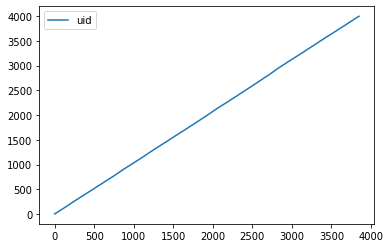

In [41]:
pd.DataFrame(df2).plot()


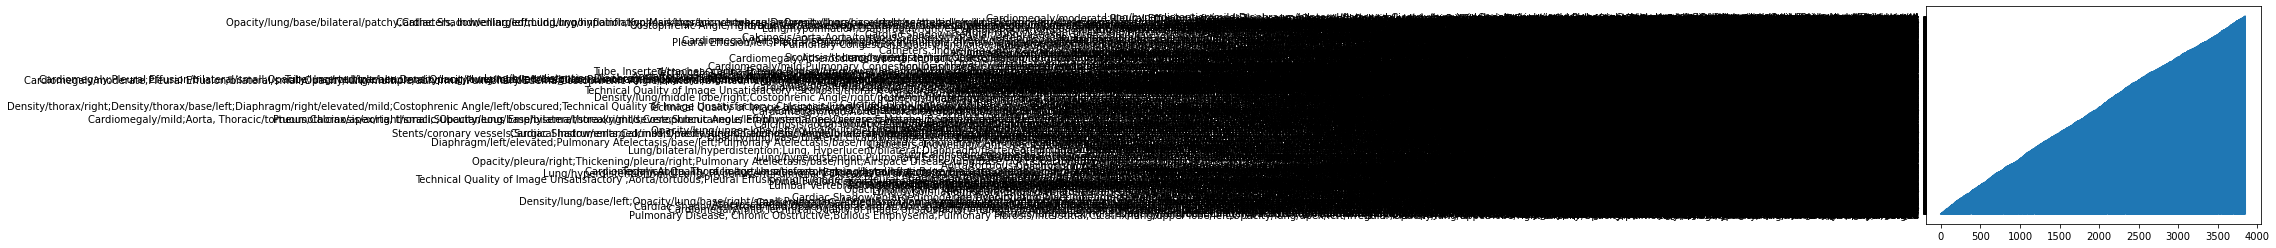

In [64]:
plt.plot(df2['MeSH'])

In [104]:
i=0
for column in df2['MeSH'].unique():
  # print(i," ",column,"\n")
  i=i+1
print(i)

1900


In [81]:
# unique, counts = np.unique(df2['MeSH'], return_counts=True)
# dict(zip(unique,counts))

In [88]:
from collections import Counter
results = Counter()
df2['MeSH'].str.lower().str.split().apply(results.update)
print(results)

Counter({'normal': 1379, 'calcified': 174, 'thoracic': 101, 'no': 92, 'indexing': 92, 'lobe/right': 88, 'vertebrae': 86, 'quality': 84, 'of': 84, 'image': 84, 'unsatisfactory': 84, 'medical': 81, 'vertebrae/degenerative': 79, 'vertebrae/degenerative/mild': 70, 'pulmonary': 68, 'catheters,': 66, 'disease,': 48, 'chronic': 48, 'lobe/left': 47, 'diseases,': 45, 'surgical': 44, 'lung/hypoinflation': 44, 'disease': 43, 'aorta,': 40, 'technical': 40, 'granuloma/lung/lower': 40, 'granulomatous': 38, 'granuloma/lung/upper': 37, 'cardiac': 31, 'scoliosis/thoracic': 30, 'opacity/lung/lower': 29, 'implanted': 28, 'fractures,': 28, 'pleural': 27, 'obstructive': 27, 'osteophyte/thoracic': 26, 'atelectasis/lower': 26, 'airspace': 25, 'disease/lung/lower': 24, 'spondylosis/thoracic': 24, 'costophrenic': 24, 'nodes': 22, 'opacity/lung/upper': 21, 'calcinosis/lung/hilum/lymph': 21, 'spine/degenerative': 19, 'lobe/right;pulmonary': 19, 'vertebrae/mild': 18, 'hernia,': 18, 'granuloma/lung/middle': 18, 's

In [99]:
pd.DataFrame(results,index=[0])

,normal,cardiomegaly/borderline;pulmonary,artery/enlarged,pulmonary,"disease,",chronic,obstructive;bullous,emphysema;pulmonary,fibrosis/interstitial;cicatrix/lung/upper,lobe/left;opacity/lung/apex/left/irregular;opacity/lung/upper,...,effusion/left/small;thickening/pleura/left;opacity/lung/base/bilateral/patchy/streaky;costophrenic,angle/left/blunted/mild;diaphragmatic,lobe/left/anterior,vertebrae/scattered/degenerative;osteophyte/thoracic,opacity/lung/lingula/streaky;opacity/lung/base/left/streaky;diaphragm/left/elevated;calcified,granuloma/thorax/right/small,cardiomegaly/mild;diaphragm/left/elevated,congestion;heart,lung/hyperdistention/mild;diaphragm/bilateral/flattened;cicatrix/lung/middle,lobe/right/round/small;granuloma/lung/upper
0,1379,2,2,68,48,48,1,3,1,1,...,1,1,1,1,1,1,1,1,1,1


In [102]:
df2['Problems'].shape

(3851,)

In [105]:
i=0
for rows in df2['Problems'].unique():
  i=i+1
print(i)

1432


In [108]:
from collections import Counter
results = Counter()
df2['Problems'].str.lower().str.split().apply(results.update)
print(results)

Counter({'normal': 1379, 'calcified': 174, 'vertebrae': 169, 'granuloma': 144, 'thoracic': 117, 'atelectasis': 110, 'disease': 97, 'no': 92, 'indexing': 92, 'lung': 87, 'quality': 84, 'of': 84, 'image': 84, 'unsatisfactory': 84, 'medical': 81, 'pulmonary': 68, 'catheters,': 66, 'instruments': 55, 'bone': 53, 'effusion': 51, 'disease,': 48, 'chronic': 48, 'diseases,': 45, 'indwelling': 45, 'surgical': 44, 'device': 44, 'spine': 41, 'aorta,': 40, 'technical': 40, 'calcinosis': 39, 'granulomatous': 38, 'opacity': 35, 'lung;pulmonary': 33, 'cardiac': 31, 'opacity;pulmonary': 30, 'cardiomegaly': 29, 'implanted': 28, 'fractures,': 28, 'scoliosis': 28, 'pleural': 27, 'effusion;pulmonary': 27, 'obstructive': 27, 'cardiomegaly;pulmonary': 25, 'airspace': 25, 'disease;pulmonary': 25, 'costophrenic': 24, 'congestion': 23, 'bodies': 21, 'spondylosis': 20, 'edema': 20, 'osteophyte': 19, 'hiatal': 19, 'hernia,': 18, 'emphysema': 18, 'angle;pleural': 16, 'eventration': 16, 'angle': 15, 'tube,': 15, '

In [109]:
pd.DataFrame(results,index=[0])

,normal,cardiomegaly;pulmonary,artery,pulmonary,"disease,",chronic,obstructive;bullous,emphysema;pulmonary,fibrosis;cicatrix;opacity;opacity;opacity;opacity,osteophyte;thickening;lung,...,lung;spine;bone,lung;opacity;sarcoidosis,aorta;atherosclerosis,effusion;thickening;opacity;costophrenic,thoracic;calcinosis;calcinosis,opacity;opacity;diaphragm;calcified,cardiomegaly;diaphragm,congestion;heart,lung;diaphragm;cicatrix;pulmonary,opacity;granuloma
0,1379,25,6,68,48,48,1,4,1,1,...,1,1,1,1,1,1,1,1,1,1


In [111]:
df2['image'].shape

(3851,)

In [113]:
from collections import Counter
results = Counter()
df2['image'].str.lower().str.split().apply(results.update)
print(results)

Counter({'chest': 3304, 'xxxx': 3195, 'and': 3106, 'lateral': 2992, 'pa': 2735, 'xxxx,': 1261, 'xray': 1252, 'at': 710, 'views': 568, 'x-xxxx': 481, '2': 475, 'xxxx.': 459, 'of': 430, 'the': 410, 'dated': 400, '2v': 299, 'hours.': 298, 'frontal/lateral': 290, 'pm': 266, 'chest,': 236, 'radiograph': 212, 'chest.': 194, 'on': 168, 'hours': 157, 'frontal': 145, 'views,': 139, 'comparison': 120, 'view': 107, 'performed': 92, '(2': 89, 'chest:': 85, 'views.': 83, 'radiographs': 75, 'ap': 71, 'two-view': 70, 'two': 68, 'with': 54, 'p.m.': 51, 'a.m.': 51, 'lateral,': 49, 'a.m..': 47, 'views)': 45, 'p.m..': 45, 'images)': 44, 'xxxx/xxxx': 43, 'radiographs,': 43, '.': 41, 'x-xxxx,': 40, 'examination': 37, 'xr': 31, 'lat': 29, 'radiograph,': 27, '3': 23, '(2)': 23, 'comparisxxxx/xxxx': 22, 'to': 22, 'radiographs.': 22, 'no': 21, 'lateral)': 20, 'lateral.': 20, 'from': 19, 'right': 19, 'left': 17, 'x': 17, 'are': 17, '(pa': 16, 'compared': 16, 'pm.': 16, '(': 15, 'radxxxx': 14, 'heart': 14, 'imag

In [114]:
pd.DataFrame(results,index=[0])

,xray,chest,pa,and,lateral,"chest,",2,"views,",frontal,views,...,patient,hodgkin's,lymphoma,24,"abdomen,",xxxx/,908xxxx,unilat,3.,146
0,1252,3304,2735,3106,2992,236,475,139,145,568,...,1,1,1,1,1,1,1,1,1,1


In [117]:
df2['indication'].shape

(3851,)

In [118]:
df2['indication'].dtype

dtype('O')

In [119]:
df2['indication'].unique()

array(['Positive TB test', 'Preop bariatric surgery.',
       'rib pain after a XXXX, XXXX XXXX steps this XXXX. Pain to R back, R elbow and R rib XXXX, no previous heart or lung hx, non-XXXX, no hx ca',
       ..., 'XXXX-year-old male with chest pain, positive troponin',
       'Nausea, vomiting x2 weeks. Dialysis patient.',
       'This is a XXXX-year-old female patient with shortness of breath.'],
      dtype=object)

In [124]:
i=0
for column in df2['indication'].unique():
  # print(i," ",column,"\n")
  i=i+1
print(i)

2455


In [126]:
df2['indication'].sample()

3583    left chest pain pleurisy
Name: indication, dtype: object

In [129]:
df2['comparison'].sample()

1906    XXXX, XXXX
Name: comparison, dtype: object

In [131]:
df2['findings'].sample()

1680    The cardiomediastinal contours are stable and ...
Name: findings, dtype: object

In [132]:
df2['impression'].sample()

3018    No acute cardiopulmonary abnormalities are see...
Name: impression, dtype: object